In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

O comando `np.random.randn(n)` retorna uma amostra de tamanho `n` normalmente distribuida com média zero e variância 1.

Para amostras aleatórias com distribuição $N(\mu, \sigma^2)$, devemos executar:
```mu + sigma * np.random.randn(...)```

**Série com média constante**

In [47]:
# Vamos criar uma série com 100 valores de uma normal com média 10 e desvio-padrão 0.2
# semente aleatória
np.random.seed(33) 
# vetor com 100 observações
rand = 10 + 0.2 * np.random.randn(100)

C:\Users\vitor\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\vitor\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


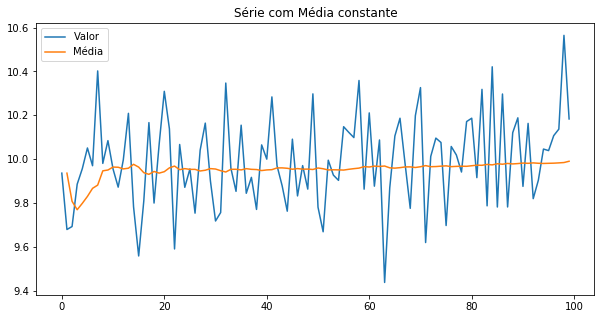

In [48]:
# calcula uma série com valores médios acumulados do primeiro valor até o dia anterior
mean = [np.mean(rand[:x]) for x in range(len(rand))]

# Plotar gráfico
plt.plot(rand, label='Valor')
plt.plot(mean, label='Média')
plt.title('Série com Média constante')
plt.legend()
plt.show()

**Série com média variável**

C:\Users\vitor\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\vitor\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


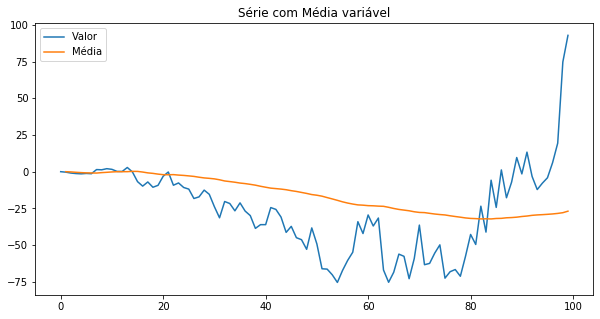

In [50]:
# Vamos criar uma série com 100 valores de uma normal com média 10 e desvio-padrão 0.2
# semente aleatória
np.random.seed(33) 
# vetor com 100 observações
rand2 = np.cumsum([x for x in range(100) * np.random.randn(100) * 0.2])

#Criando uma média que se expande do primeiro valor e acumulado até cada dia anterior
mean2 = [np.mean(rand2[:x]) for x in range(len(rand2))]

# Plotar gráfico
plt.plot(rand2, label='Valor')
plt.plot(mean2, label='Média')
plt.title('Série com Média variável')
plt.legend()
plt.show()

**Série com variância variável**

C:\Users\vitor\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\vitor\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
C:\Users\vitor\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


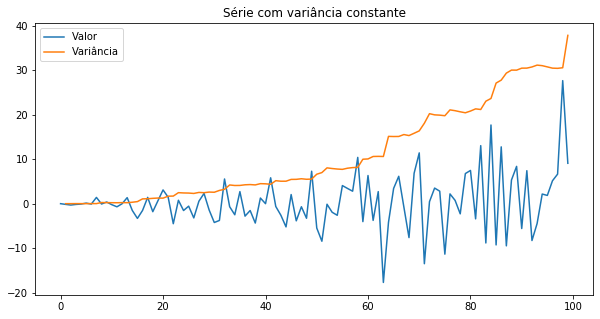

In [53]:
# Vamos criar uma série com 100 valores de uma normal com média 10 e desvio-padrão 0.1
# semente aleatória
np.random.seed(33) 
# vetor com 100 observações
rand3 = [x for x in range(100) * np.random.randn(100) * 0.1]

#Criando uma média que se expande do primeiro valor e acumulado até cada dia anterior
var = [np.var(rand3[:x]) for x in range(len(rand3))]

# Plotar gráfico
plt.plot(rand3, label='Valor')
plt.plot(var, label='Variância')
plt.title('Série com variância constante')
plt.legend()
plt.show()

De forma muito breve vamos fazer uma breve apresentação dos modelos autoregressivos de médias móveis.

### Modelos Autoregressivos (AR)

**Modelos AR**

- AR(1): $y_t = a_1 y_{t-1} + \epsilon_t$

- AR(2): $y_t = a_1 y_{t-1} + a_2 y_{t-2} + \epsilon_t$

- AR(p): $y_t = a_1 y_{t-1} + a_2 y_{t-2} + \cdots + a_p y_{t-p} + \epsilon_t$


### Modelos de médias móveis (MA)

**Modelos MA**

- MA(1): $y_t = m_1 \epsilon_{t-1} + \epsilon_t$

- MA(2):: $y_t = m_1 \epsilon_{t-1} + m_2 \epsilon_{t-2} + \epsilon_t$

- MA(q): $y_t = m_1 \epsilon_{t-1} + m_2 \epsilon_{t-2} + \cdots + m_q \epsilon_{t-q} + \epsilon_t$



### Modelos ARMA

**ARMA = AR + MA**

- Modelo ARMA(1, 1): $y_t = a_1 y_{t-1} + m_1 \epsilon_{t-1} + \epsilon_t$


Para simular processos ARMA vamos usar o módulo `arima_process` no `statsmodels`.

In [12]:
# Importar arma_process
from statsmodels.tsa.arima_process import ArmaProcess

# Importar plot_acf
from statsmodels.graphics.tsaplots import plot_acf

Vamos começar simulando um processo AR(1), verificando o gráfico da série e o seu correlograma.

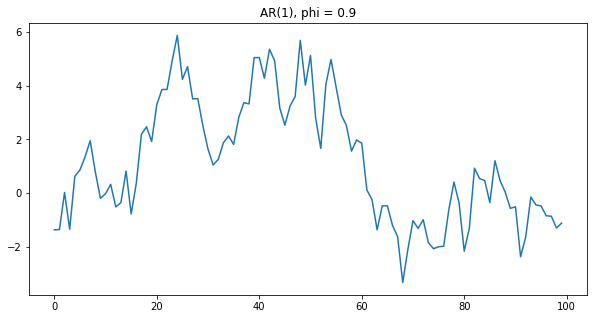

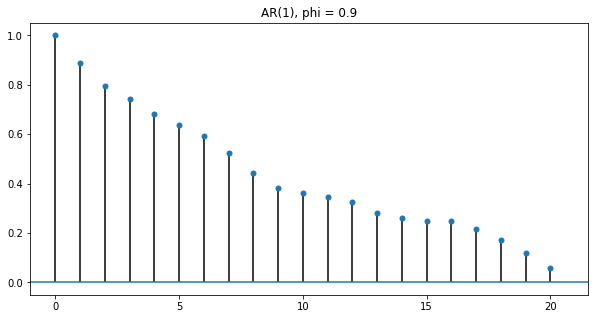

In [43]:
#  AR(1) com parâmetro = + 0.9
ar1 = np.array([1, -0.9]) # note o sinal inverso 
# Componente simples 
ma1 = np.array([1])

ar1_process = ArmaProcess(ar1, ma1)
sim_ar1 = ar1_process.generate_sample(nsample=100)

# Plotar série
plt.plot(sim_ar1)
plt.title('AR(1), phi = 0.9')
# Plotar correlograma do processo AR(1), parâmetro = +0.9
plot_acf(sim_ar1, alpha=1, lags=20)
plt.title('AR(1), phi = 0.9')
plt.show()

Vamos ver o comportamento do processo AR(1).

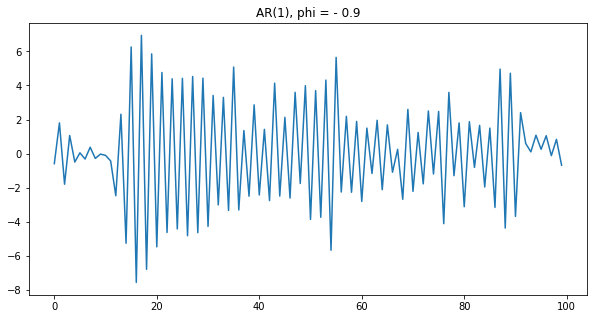

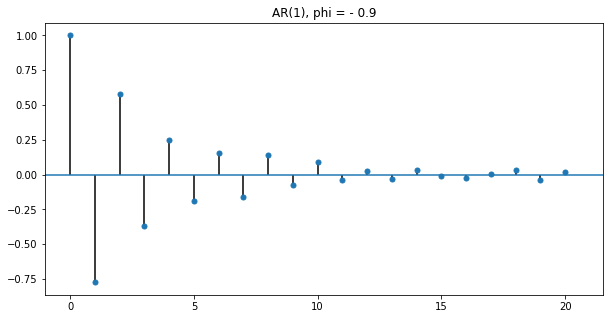

In [45]:
#  AR(1) com parâmetro = - 0.9
ar1b = np.array([1, 0.9]) # note o sinal inverso 
# Componente simples 
ma1 = np.array([1])

ar1_process2 = ArmaProcess(ar1b, ma1)
sim2_ar1 = ar1_process2.generate_sample(nsample=100)

# Plotar série
plt.plot(sim2_ar1)
plt.title('AR(1), phi = - 0.9')
plt.show()
# Plotar correlograma do processo AR(1), parâmetro = - 0.9
plot_acf(sim_ar2, alpha=1, lags=20)
plt.title('AR(1), phi = - 0.9')
plt.show()